## Step 1: Import Required Libraries & Load Dataset

In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import (
    confusion_matrix, classification_report, accuracy_score, 
    precision_score, recall_score, f1_score, roc_curve, auc
)
diabetes = datasets.load_diabetes()
df = pd.DataFrame(data=diabetes.data, columns=diabetes.feature_names)
df['target'] = diabetes.target

## Step 2: Print Top 5 Rows of dataset

In [10]:
df.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641,135.0


## Step 3: Print All Feature (Columns) Names & Number of Rows

In [11]:
print("Feature Names:", list(df.columns))
print("Number of Rows:", df.shape[0])

Feature Names: ['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6', 'target']
Number of Rows: 442


## Step 4: Train-Test Split & Data Scaling

In [12]:
X = df.drop(columns=['target'])
y = (df['target'] > df['target'].median()).astype(int)  # Convert to binary classification

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

## Step 5: Train SVM Model

In [13]:
svm_model = SVC(kernel='linear', probability=True)
svm_model.fit(X_train, y_train)

print("SVM Model Trained Successfully")

SVM Model Trained Successfully


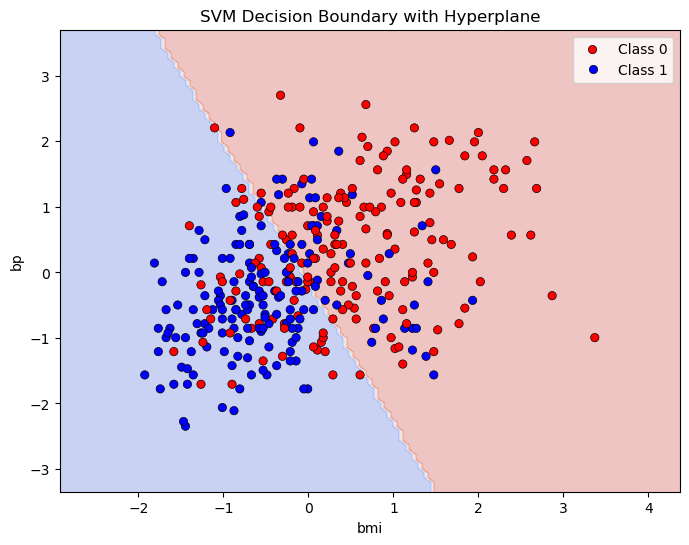

In [15]:
feature_1 = 'bmi'
feature_2 = 'bp'
X_vis = df[[feature_1, feature_2]]
y_vis = (df['target'] > df['target'].median()).astype(int)
X_train_vis, X_test_vis, y_train_vis, y_test_vis = train_test_split(X_vis, y_vis, test_size=0.2, random_state=42)
scaler_vis = StandardScaler()
X_train_vis = scaler_vis.fit_transform(X_train_vis)
X_test_vis = scaler_vis.transform(X_test_vis)
svm_vis = SVC(kernel='linear')
svm_vis.fit(X_train_vis, y_train_vis)
plt.figure(figsize=(8,6))
x_min, x_max = X_train_vis[:, 0].min() - 1, X_train_vis[:, 0].max() + 1
y_min, y_max = X_train_vis[:, 1].min() - 1, X_train_vis[:, 1].max() + 1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100), np.linspace(y_min, y_max, 100))
Z = svm_vis.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.coolwarm)
sns.scatterplot(x=X_train_vis[:, 0], y=X_train_vis[:, 1], hue=y_train_vis, palette=['blue', 'red'], edgecolor='k')
plt.xlabel(feature_1)
plt.ylabel(feature_2)
plt.title("SVM Decision Boundary with Hyperplane")
plt.legend(["Class 0", "Class 1"])
plt.show()

## Step 6: Prediction

In [16]:
y_pred = svm_model.predict(X_test)
y_prob = svm_model.predict_proba(X_test)[:, 1]

print("Predictions Completed")

Predictions Completed


## Step 7: Confusion Matrix

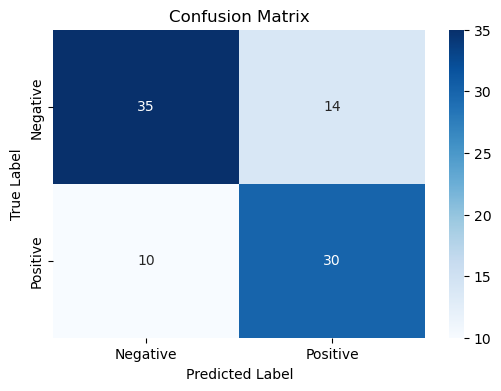

In [17]:
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=["Negative", "Positive"], yticklabels=["Negative", "Positive"])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

## Step 8: Precision, Recall, F1 Score, Accuracy

In [18]:
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)

print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"Accuracy: {accuracy:.4f}")

Precision: 0.6818
Recall: 0.7500
F1 Score: 0.7143
Accuracy: 0.7303


## Step 9: ROC Curve

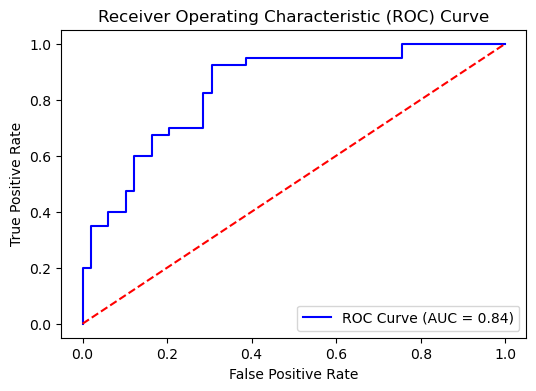

In [19]:
fpr, tpr, _ = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, color='blue', label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='red', linestyle='--')  # Diagonal reference line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()